In [5]:
import h5py
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt

import utils

## Read file

In [6]:
plot_data_file = "../../test_sims/sim6/outputs/plot_mesh.h5"
f_plot_mesh = h5py.File(plot_data_file, 'r')

## Variables

In [7]:
for k in f_plot_mesh['95/Mesh']:
    print(f"{k: >15} => {f_plot_mesh['95/Mesh'][k].shape}")

     ElementMap => (1849039, 1)
  MixedElements => (12943273, 1)
        NodeMap => (982998, 1)
          Nodes => (982998, 3)


## Exploration

In [8]:
elementMap = f_plot_mesh['95/Mesh/ElementMap']
mixedElements = f_plot_mesh['95/Mesh/MixedElements']
nodeMap = f_plot_mesh['95/Mesh/NodeMap']
nodes = f_plot_mesh['95/Mesh/Nodes']

print(f"{'elementMap:':>20}", elementMap.shape)
print(f"{'mixedElements:':>20}", mixedElements.shape)
print(f"{'nodeMap:':>20}", nodeMap.shape)
print(f"{'nodes:':>20}", nodes.shape)

         elementMap: (1849039, 1)
      mixedElements: (12943273, 1)
            nodeMap: (982998, 1)
              nodes: (982998, 3)


In [13]:
nodes_df = pd.DataFrame(nodes)
nodes_df.columns = 'x', 'y', 'z'
nodes_df

,x,y,z
0,15243.384766,23071.832031,34.214007
1,15236.783203,23070.341797,34.198882
2,15243.384766,23071.832031,36.937123
3,15236.783203,23070.341797,36.902592
4,15238.548828,23062.041016,34.116172
...,...,...,...
982993,14501.454102,22524.093750,67.756534
982994,14413.184570,22626.380859,72.526685
982995,14399.963867,22612.195312,71.925968
982996,14639.519531,22625.689453,71.997814


In [14]:
nodes_df.groupby(['x', 'y']).size()

x             y           
14210.081055  22181.941406    18
14212.519531  22196.642578    18
14214.958008  22211.345703    18
14217.396484  22226.046875    18
14218.166016  22189.792969    18
                              ..
15909.396484  23186.304688    18
15910.303711  23199.550781    18
15913.402344  23181.818359    18
15915.141602  23193.513672    18
15919.978516  23187.476562    18
Length: 54611, dtype: int64

In [19]:
me_np = np.array(mixedElements)
me_np

array([[     8],
       [     0],
       [     1],
       ...,
       [980117],
       [979618],
       [982853]], dtype=int32)

In [20]:
len(me_np)/1849039

7.0

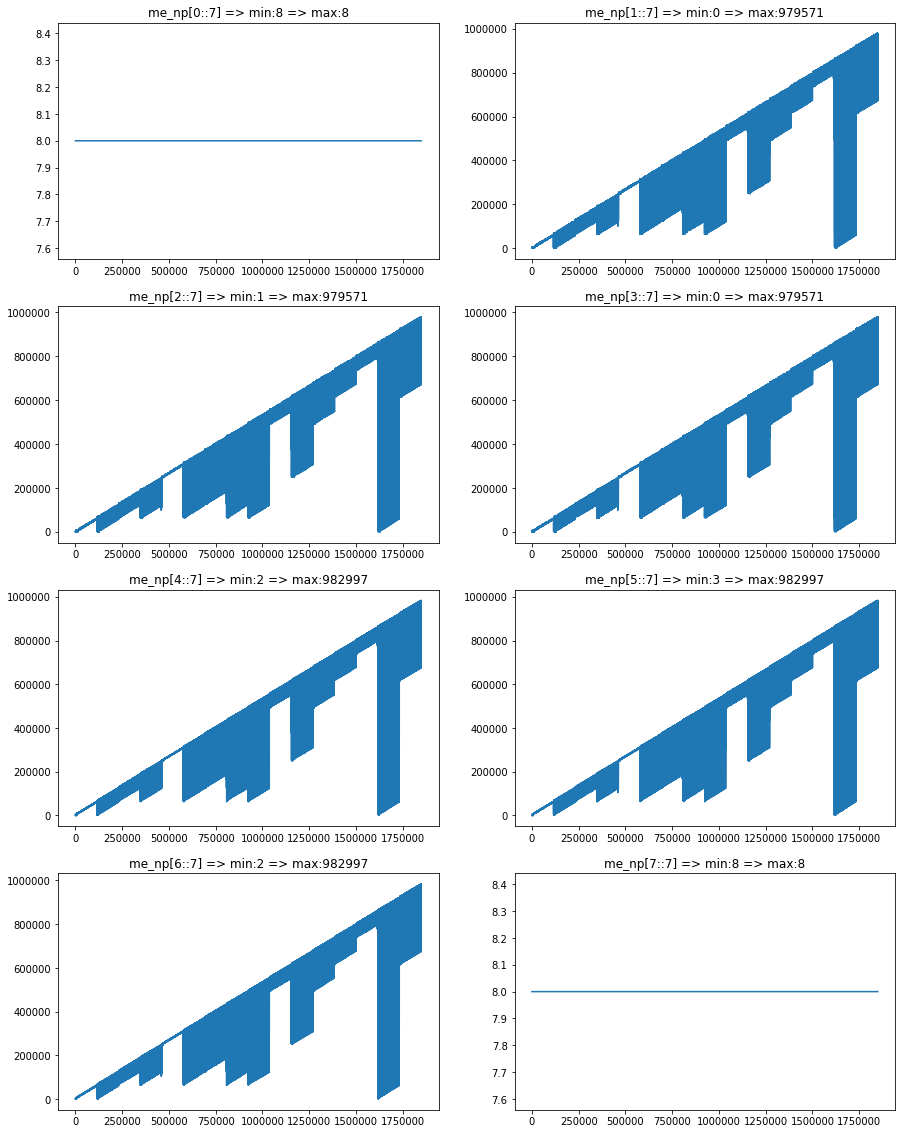

In [68]:
# MixedElements has 7 times the number of entries in Elements(Tritium concentration in this case).

nrows = 4
ncols = 2
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,20))
for i in range(nrows):
    for j in range(ncols):
        data = me_np[(i*ncols+j)::7]
        ax[i, j].plot(data)
        ax[i, j].set_title(f"me_np[{(i*ncols+j)}::7] => min:{np.min(data)} => max:{np.max(data)}")

In [47]:
print("np.min(me_np[1::7]", np.min(me_np[1::7]))
print("np.max(me_np[1::7]", np.max(me_np[1::7]))
print("len:", len(me_np[1::7]))

np.min(me_np[1::7] 0
np.max(me_np[1::7] 979571
len: 1849039


---
Assuming for now that there is a repetition of elements 7 times.

So just picking one of the 7 copies and moving forward with it. Picking the first index for now.

There might be a more meaningful reason for this but moving forward with this assumption for now.

In [69]:
mixed_element_map = me_np[1::7]

In [71]:
mixed_element_map

array([[     0],
       [     6],
       [    12],
       ...,
       [976807],
       [976192],
       [976691]], dtype=int32)

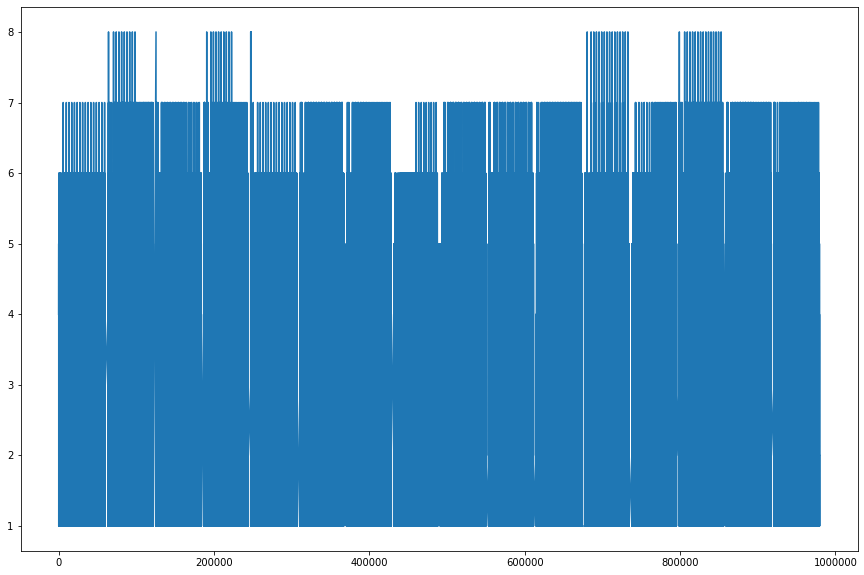

In [83]:
uniq_vals, val_counts = np.unique(mixed_element_map, return_counts=True)

plt.figure(figsize=(15,10))
plt.plot(uniq_vals, val_counts)
# plt.show()

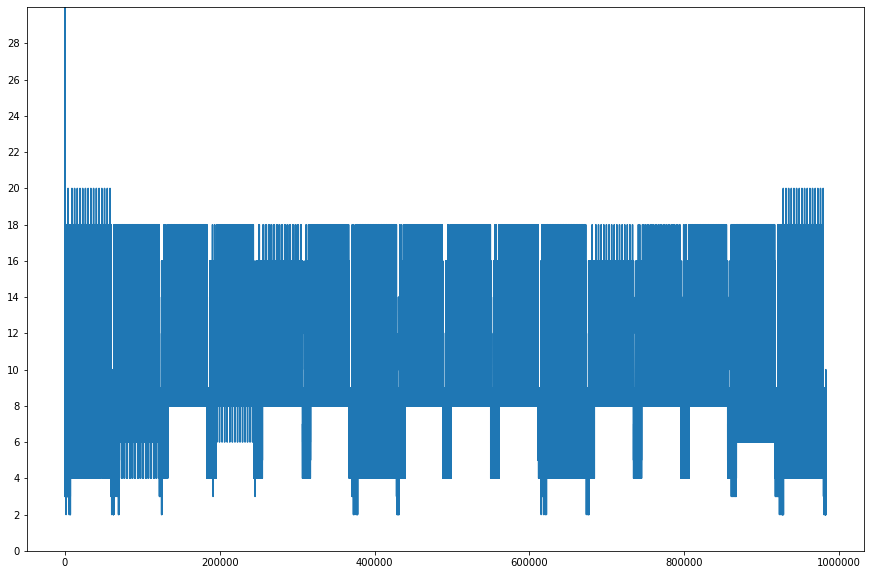

In [98]:
uniq_vals, val_counts = np.unique(mixedElements, return_counts=True)

plt.figure(figsize=(15,10))
plt.plot(uniq_vals, val_counts)
plt.ylim(0,30)
plt.yticks(np.arange(0,30,2))
plt.show()

In [94]:
uniq_vals, val_counts = np.unique(mixedElements, return_counts=True)
print(f"""{
np.argmax(val_counts)
}\n{
np.max(val_counts)
}\n{
'hmmm'
}""")

8
1849051
hmmm
